# Regularization In Regression Models

In [1]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [3]:
data =pd.read_csv('Admission_Prediction.csv')

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now, it seems that there are no missing values. Also, the first cloumn is just serial numbers, so we don't need that column. Let's drop it from data and make it more clean.

In [7]:
data= data.drop(columns = ['Serial No.'])

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Visualizing the data and analyzing the relationship between independent and dependent variables

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

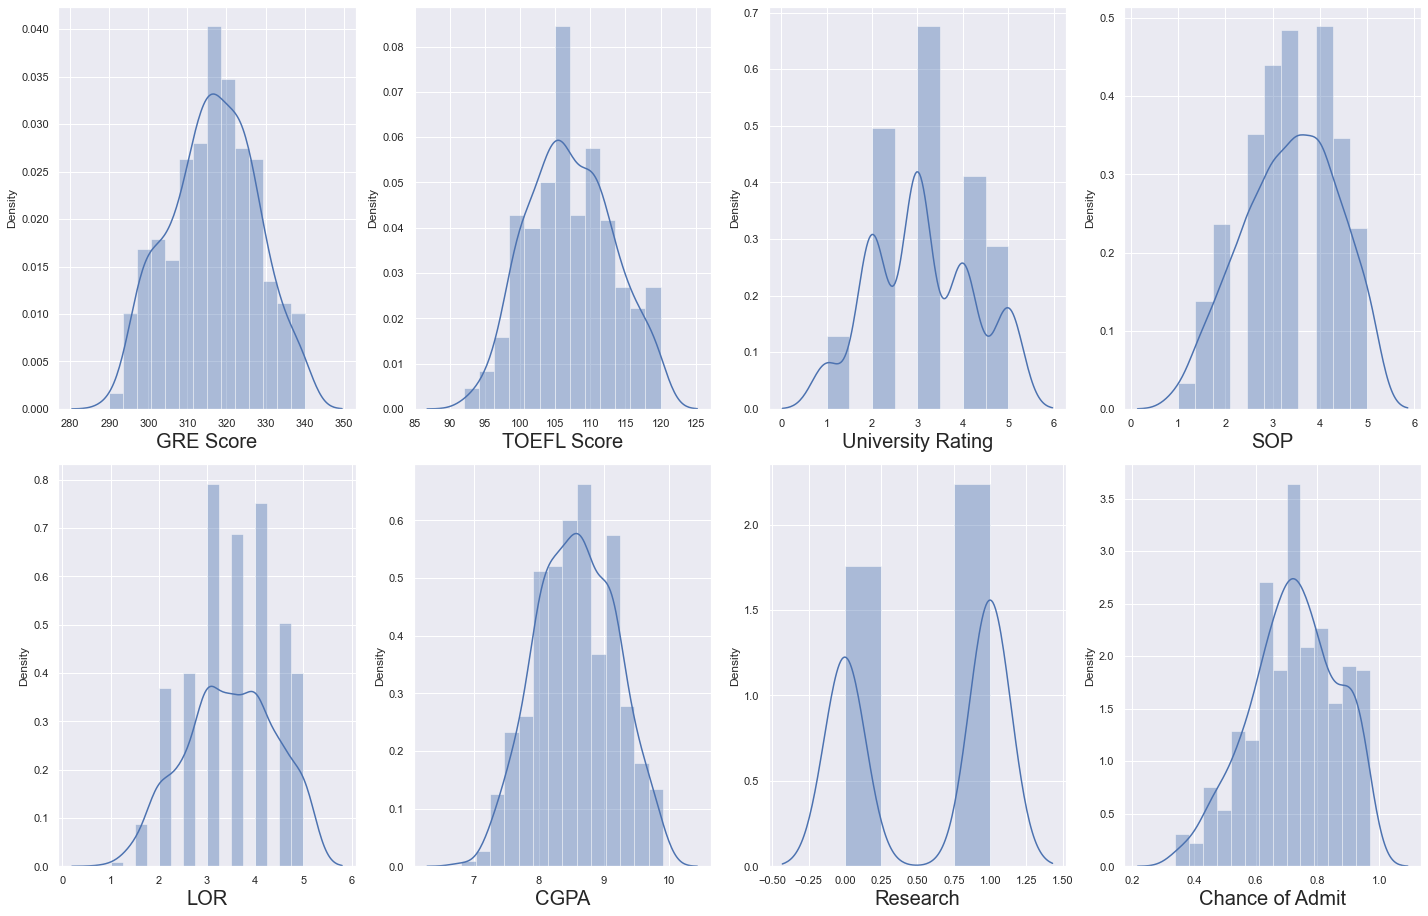

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')

plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1

plt.tight_layout()

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

In [9]:
y = data['Chance of Admit']

X =data.drop(columns = ['Chance of Admit'])

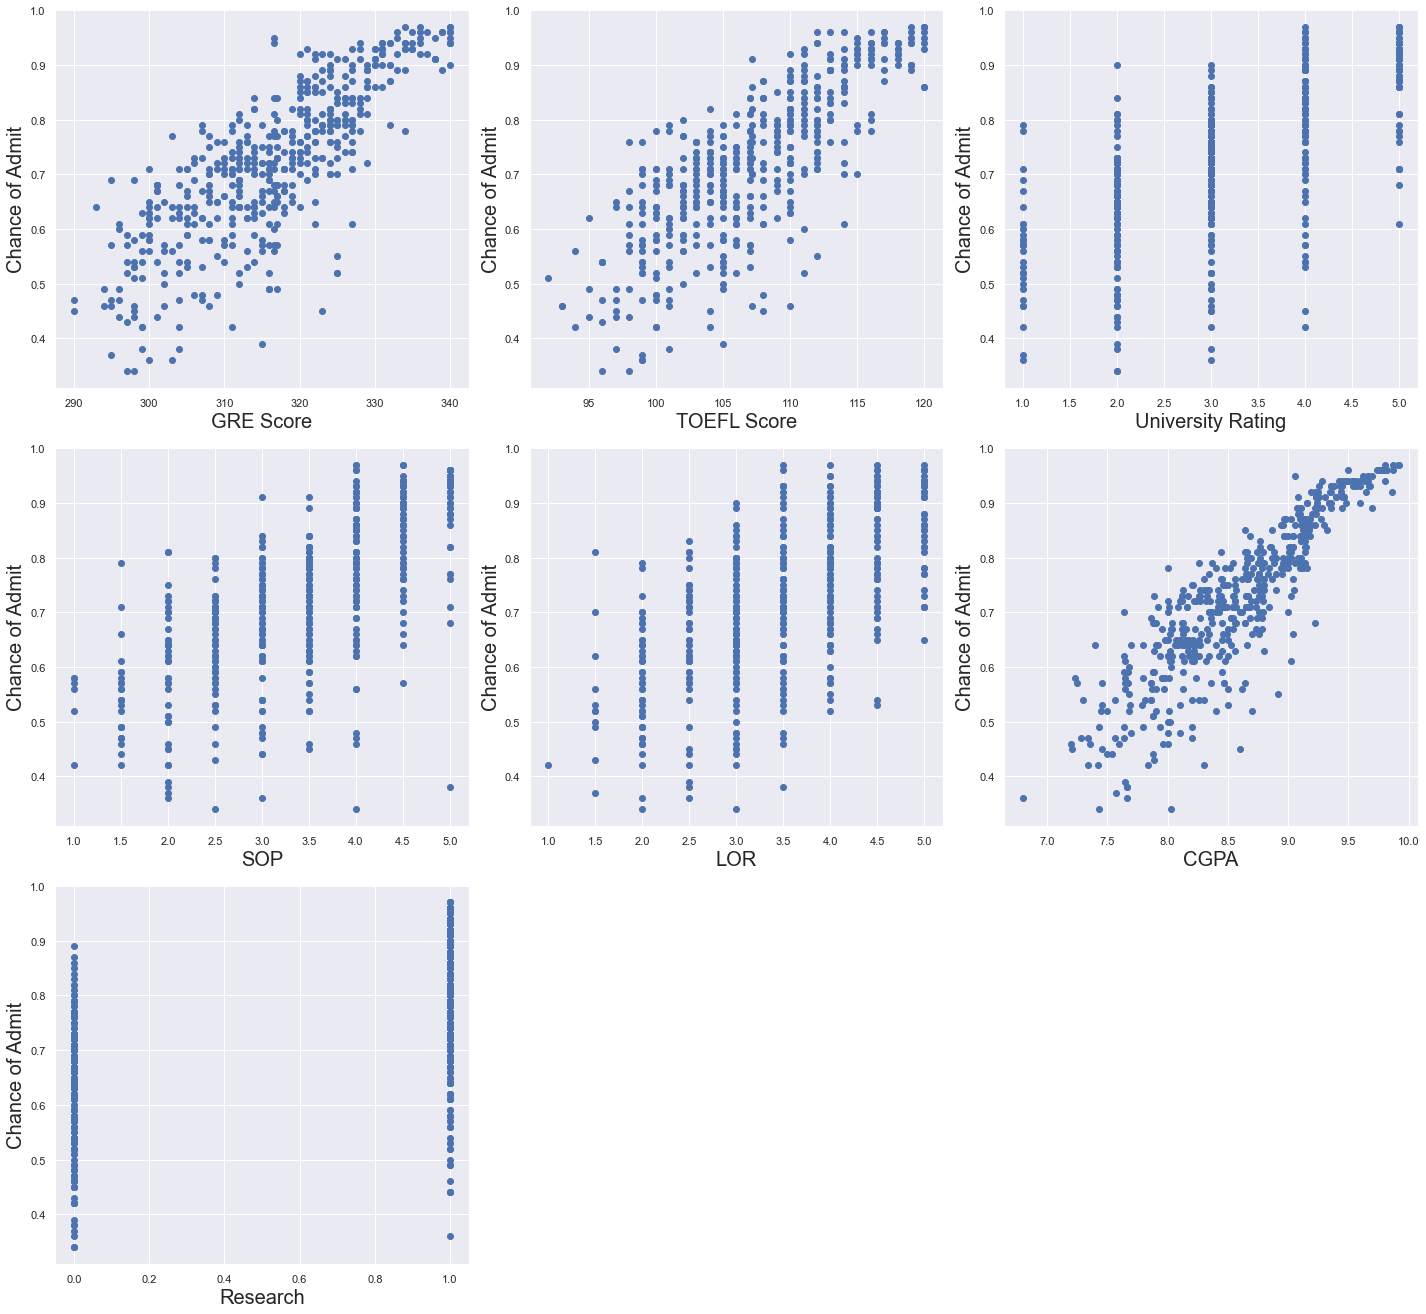

In [10]:
plt.figure(figsize=(20,30), facecolor='white')

plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1

plt.tight_layout()

The relationship between the dependent and independent variables look fairly linear. Let's check for multicollinearity.

In [11]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

# Finally, Including names so it is easier to explore the results
vif["Features"] = X.columns

vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [14]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [15]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [16]:
import pickle

In [17]:
# saving the model to the local file system
filename = 'finalized_model.pickle'

pickle.dump(regression, open(filename, 'wb'))

In [18]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))

a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.92190162])

In [19]:
regression.score(x_train,y_train)

0.8415250484247909

In [20]:
adj_r2(x_train,y_train)

0.8385023654247188

Our r2 score is 84.15% and adj r2 is 83.85% for our training set. So looks like we are not being penalized for the use of any feature.

Let's check how well our model fits the test data and also if our model is overfitting data using regularization.

In [21]:
regression.score(x_test,y_test)

0.7534898831471066

In [22]:
adj_r2(x_test,y_test)

0.7387414146174464

It looks like our model's r2 score is less on the test data.

Let's see if our model is overfitting our training data.

## Lasso Regularization

In [23]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)

lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [24]:
# best alpha parameter
alpha = lasscv.alpha_

alpha

3.0341655445178153e-05

In [25]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [26]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

our r2_score for test data (75.34%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

## Ridge Regularization

In [27]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))

ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)

ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([8.32053206, 0.97143065, 6.54279649, 7.37375194, 1.7576191 ,
       3.62089761, 8.82891779, 8.34921866, 4.20187508, 7.75836938,
       7.76648668, 6.209708  , 8.46758642, 8.74319151, 4.21388297,
       2.90035503, 1.50785274, 6.9898729 , 0.65368953, 1.21072565,
       4.65333861, 6.00804338, 0.36434993, 4.04467589, 8.35398254,
       3.3043884 , 4.42708623, 9.04611109, 4.43311728, 4.60013896,
       3.27555494, 5.98973337, 9.59266043, 9.48978749, 5.54615543,
       5.33648905, 7.43002047, 5.62211238, 8.66098743, 8.43597501,
       1.48156661, 2.47578605, 0.13964676, 5.87687651, 7.08564794,
       4.41192713, 2.69980954, 6.85855913, 7.6066549 , 4.94635393]),
        cv=10, normalize=True)

In [28]:
ridgecv.alpha_

0.13964676130175158

In [29]:
ridge_model = Ridge(alpha=ridgecv.alpha_)

ridge_model.fit(x_train, y_train)

Ridge(alpha=0.13964676130175158)

In [30]:
ridge_model.score(x_test, y_test)

0.7535582132728129

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

## Elastic net

In [31]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [32]:
elasticCV.alpha_

0.0011069728449315508

In [33]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [34]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)

elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0011069728449315508)

In [35]:
elasticnet_reg.score(x_test, y_test)

0.7531695370639867

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

## Thank You :)